In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from sklearn import model_selection
from sklearn import datasets
import random

# prepare your data

## 3.1 Download data

In [2]:
raw_data = pd.read_csv('london-borough-profiles-jan2018.csv')
raw_data.dropna(how = 'any',axis = 0,inplace=True)
raw_data['Male life expectancy, (2012-14)'] = raw_data['Male life expectancy, (2012-14)'].astype('float')
raw_data['Female life expectancy, (2012-14)'] = raw_data['Female life expectancy, (2012-14)'].astype('float')

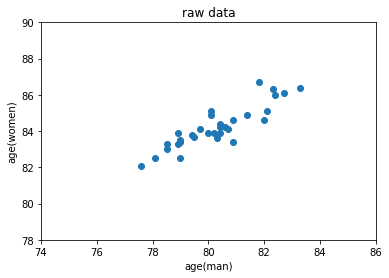

In [3]:
plt.scatter(raw_data['Male life expectancy, (2012-14)'],raw_data['Female life expectancy, (2012-14)'])

x_major_locator=MultipleLocator(2)
#把x轴的刻度间隔设置为2，并存在变量里
y_major_locator=MultipleLocator(2)
#把y轴的刻度间隔设置为2，并存在变量里
ax=plt.gca()
# #ax为两条坐标轴的实例

ax.xaxis.set_major_locator(x_major_locator)
# #把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数
plt.xlim(74,86)
#把x轴的刻度范围设置为74到86，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
plt.ylim(78,90)
#把y轴的刻度范围设置为78到90，同理，78不会标出来，但是能看到一点空白

plt.title('raw data')
plt.xlabel('age(man)')
plt.ylabel('age(women)')
plt.show()

## 3.2 Partition the data

In [4]:
# partition the data
x_train, x_test ,y_train, y_test = model_selection.train_test_split(raw_data['Male life expectancy, (2012-14)'],
                                                            raw_data['Female life expectancy, (2012-14)'],
                                                           test_size=0.10)


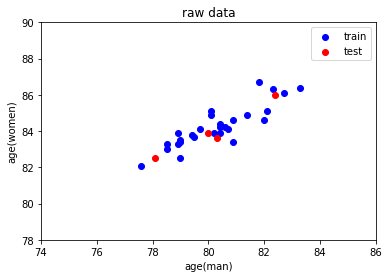

In [5]:
fig = plt.figure()
plt.scatter(x_train,y_train,color='blue')
plt.scatter(x_test,y_test,color = 'red')

x_major_locator=MultipleLocator(2)
#把x轴的刻度间隔设置为2，并存在变量里
y_major_locator=MultipleLocator(2)
#把y轴的刻度间隔设置为2，并存在变量里
ax=plt.gca()
# #ax为两条坐标轴的实例

ax.xaxis.set_major_locator(x_major_locator)
# #把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数
plt.xlim(74,86)
#把x轴的刻度范围设置为74到86，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
plt.ylim(78,90)
#把y轴的刻度范围设置为78到90，同理，78不会标出来，但是能看到一点空白
plt.legend(['train','test'])

plt.title('raw data')
plt.xlabel('age(man)')
plt.ylabel('age(women)')
plt.show()

## 3.3 Generate a synthetic dataset

Randomly generate a synthetic dataset of 100 data points (x; y), where the target variables,<br>
y, are drawn from a linear model y = p x + q with some randomly selected p and pre-defined<br>
noise factor q. We do that using the scikit-learn function datasets .make_regression (),

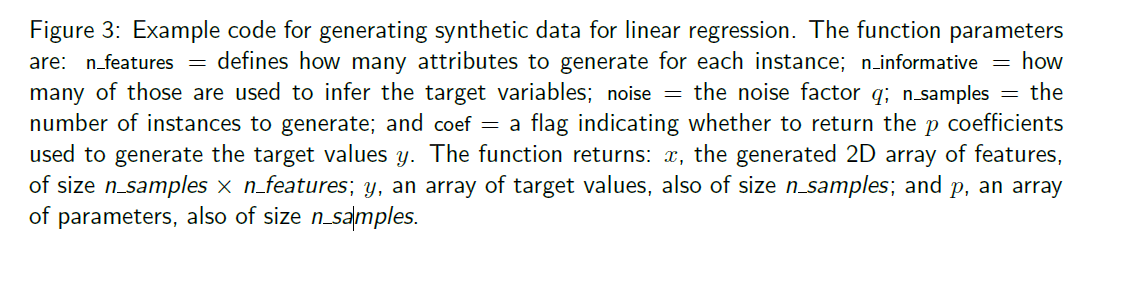

In [6]:
x,y,p = datasets.make_regression(n_samples=100,n_features=1,n_informative=1,noise=10,coef=True)

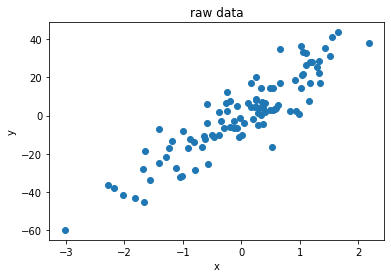

In [7]:
plt.scatter(x,y)

plt.title('raw data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [8]:
# partition the data
generate_x_train, generate_x_test ,generate_y_train, generate_y_test = model_selection.train_test_split(x,
                                                            y,
                                                           test_size=0.10)

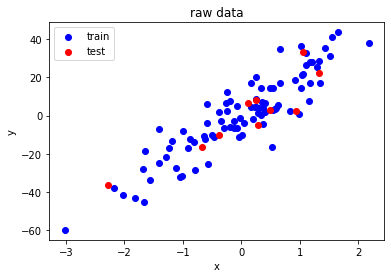

In [9]:
fig = plt.figure()
plt.scatter(generate_x_train,generate_y_train,color='blue')
plt.scatter(generate_x_test,generate_y_test,color = 'red')

plt.legend(['train','test'])

plt.title('raw data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#  Linear Regression

## 4.1 Solving Linear Regression with Gradient Descent

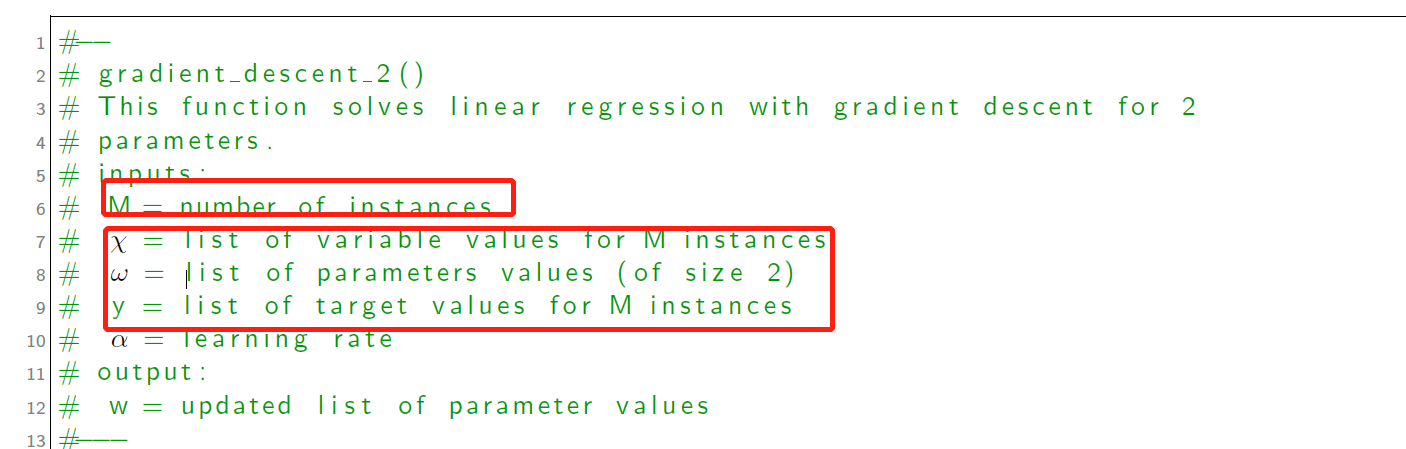

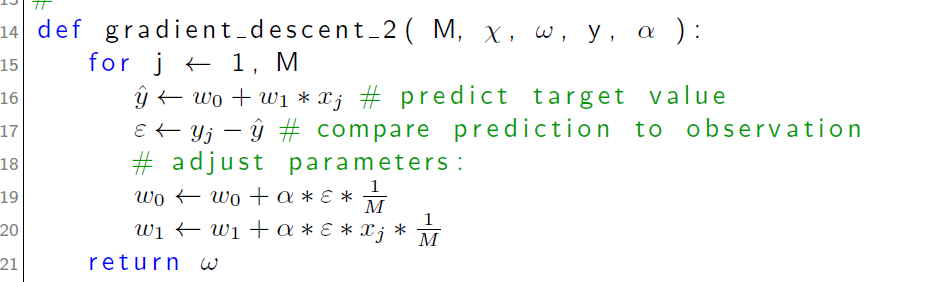

In [10]:
def deal_with_format(x):
    x = np.array(x)
    if len(x.shape)==1:
        return x.reshape(1,len(x))
    else:
        return x

In [11]:
def gradient_descent_2(M,x,w,y,alpha):
    x = deal_with_format(x)
    pending = deal_with_format([1 for i in range (x.shape[1])])
    x = np.r_[pending,x]
    w = deal_with_format(w).transpose()
    y = deal_with_format(y).transpose()
    y_pred = np.matmul(w.transpose(),x).transpose()
    w =w +  alpha/M* np.matmul(x,(y - y_pred))
    return w
    

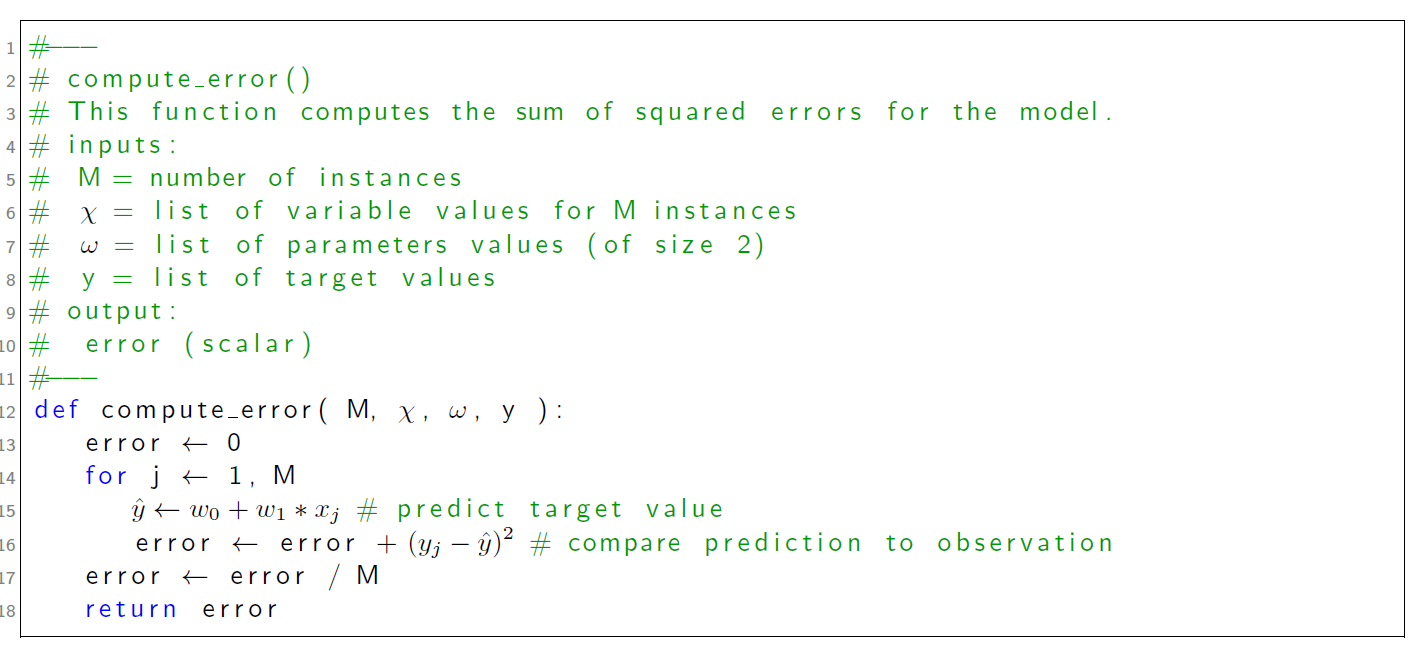

In [12]:
def compute_error(M,x,w,y):
    # x多加一个1
    # feature带上w0
    
    x = deal_with_format(x)
    pending = deal_with_format([1 for i in range (x.shape[1])])
    x = np.r_[pending,x]
    w = deal_with_format(w).transpose()
    y = deal_with_format(y).transpose()
#     print(w)
    y_pred = np.matmul(w.transpose(),x).transpose()
    
    error = np.sum((y_pred - y)**2)
    error = error/M
    return error


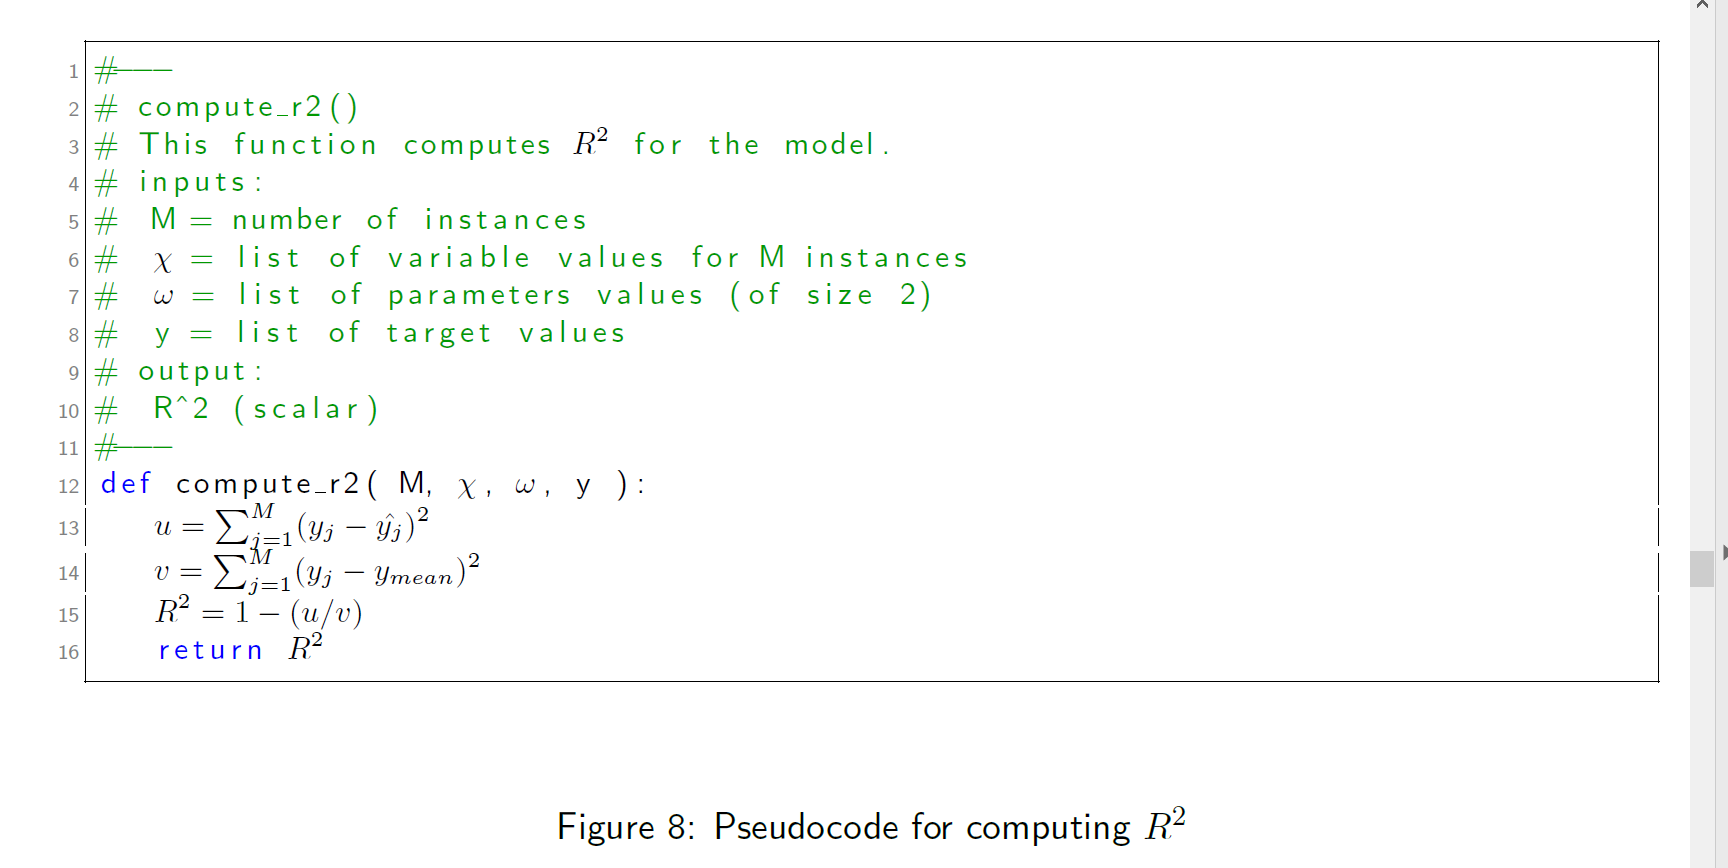

In [13]:
def compute_r2(M,x,w,y):
    x = deal_with_format(x)
    pending = deal_with_format([1 for i in range (x.shape[1])])
    x = np.r_[pending,x]
    w = deal_with_format(w).transpose()
    y = deal_with_format(y).transpose()
    y_pred = np.matmul(w.transpose(),x).transpose()
    u = np.matmul((y - y_pred).transpose(),y - y_pred)
    u =u[0][0]
    
    y_mean = np.mean(y)
    v = np.matmul((y - y_mean).transpose(),y-y_mean)
    v = v[0][0]
    
    R_square = 1 - (u/v)
    return R_square
    

In [14]:
x_train_list = list(x_train)
y_train_list = list(y_train)
M = len(y_train_list)
alpha = 0.0001

w =[0,0]
for i in range(100):
    w_matrix = gradient_descent_2(M,x_train_list,w,y_train_list,alpha)
    w = [w_matrix[0][0],w_matrix[1][0]]
    print('error')
    print(compute_error(M,x_train_list,w,y_train_list))
#     print('new_w')
#     print(gradient_descent_2(M,generate_x_test,w,generate_y_test_list,alpha))
print(w)

error
895.2400640371701
error
113.2655270885276
error
14.741894219846683
error
2.3285664406534496
error
0.7645690205829936
error
0.5675156511585074
error
0.5426882141875545
error
0.5395601085063332
error
0.539165975413989
error
0.5391163048314298
error
0.5391100342526329
error
0.5391092317879999
error
0.5391091182696716
error
0.5391090915540405
error
0.5391090757749727
error
0.5391090613738426
error
0.5391090471463239
error
0.5391090329406795
error
0.5391090187377909
error
0.5391090045352512
error
0.5391089903327552
error
0.5391089761302668
error
0.5391089619277788
error
0.5391089477252897
error
0.5391089335228079
error
0.5391089193203227
error
0.5391089051178405
error
0.539108890915357
error
0.539108876712873
error
0.5391088625103935
error
0.5391088483079138
error
0.5391088341054348
error
0.5391088199029571
error
0.539108805700479
error
0.5391087914980016
error
0.5391087772955253
error
0.5391087630930494
error
0.5391087488905711
error
0.5391087346881015
error
0.5391087204856299
error


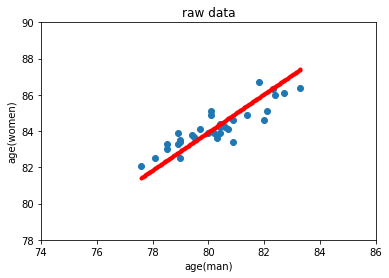

In [15]:
plt.scatter(raw_data['Male life expectancy, (2012-14)'],raw_data['Female life expectancy, (2012-14)'])

x_major_locator=MultipleLocator(2)
#把x轴的刻度间隔设置为2，并存在变量里
y_major_locator=MultipleLocator(2)
#把y轴的刻度间隔设置为2，并存在变量里
ax=plt.gca()
# #ax为两条坐标轴的实例

ax.xaxis.set_major_locator(x_major_locator)
# #把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数
plt.xlim(74,86)
#把x轴的刻度范围设置为74到86，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
plt.ylim(78,90)
#把y轴的刻度范围设置为78到90，同理，78不会标出来，但是能看到一点空白

plt.plot(np.linspace(min(x_train), max(x_train), 200), w[1] * np.linspace(min(x_train), max(x_train), 200) + w[0], c= "red", marker='.', linestyle=':')


plt.title('raw data')
plt.xlabel('age(man)')
plt.ylabel('age(women)')
plt.show()

###  step by step plot

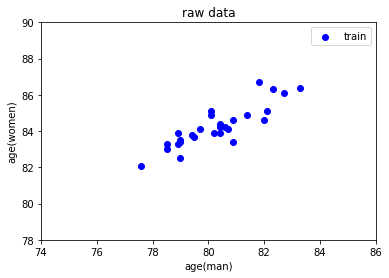

error
7101.712142857143
r square
-5715.602653086369
w
[0, 0]


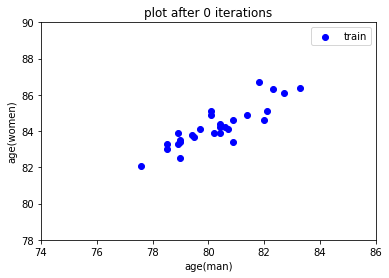

error
895.2400640371701
r square
-719.6335067201337
w
[0.008426428571428573, 0.6767468214285715]


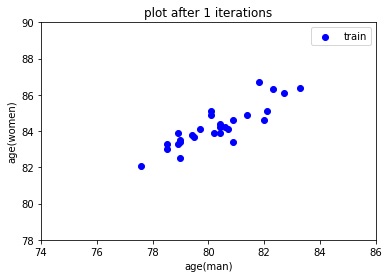

error
113.2655270885276
r square
-90.17435339994006
w
[0.011417979219221941, 0.9169618171027846]


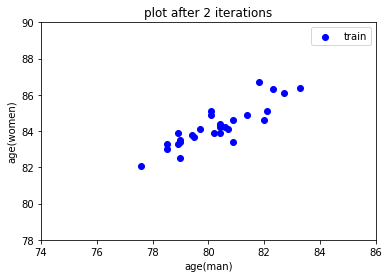

error
14.741894219846683
r square
-10.866652704792598
w
[0.012480390087756482, 1.0022274428369922]


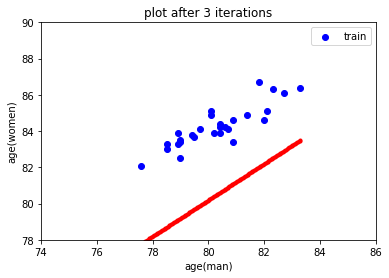

error
2.3285664406534496
r square
-0.8744056115983248
w
[0.012858042192567672, 1.0324929383898214]


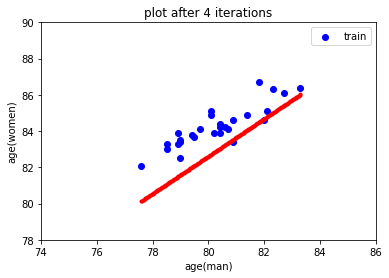

error
0.7645690205829936
r square
0.38455161183511966
w
[0.012992635411984718, 1.0432358355536424]


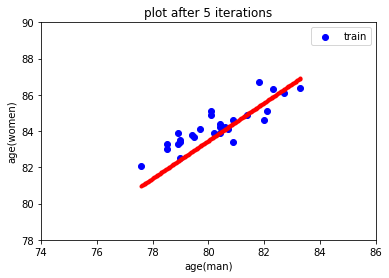

error
0.5675156511585074
r square
0.5431719264566617
w
[0.013040953544603325, 1.0470490791584337]


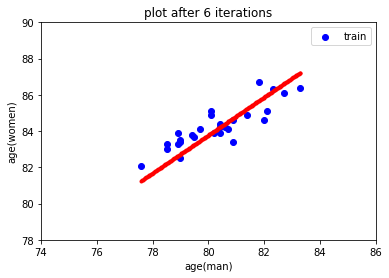

error
0.5426882141875545
r square
0.563157049649839
w
[0.013058647861134913, 1.048402604159619]


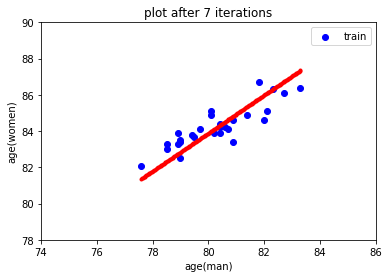

error
0.5395601085063332
r square
0.5656750533194739
w
[0.013065472085877116, 1.0488830385282948]


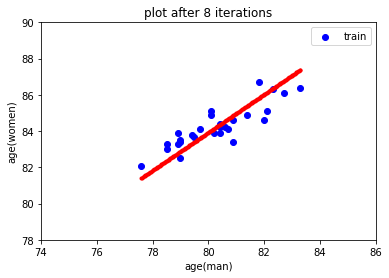

error
0.539165975413989
r square
0.5659923151622579
w
[0.013068437911800082, 1.0490535645800363]


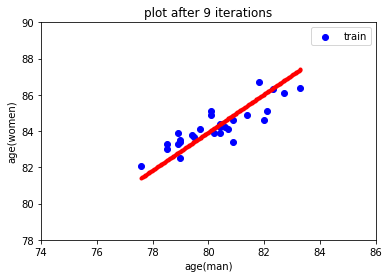

error
0.5391078541364023
r square
0.5660391005349918
w
[0.013147127552501275, 1.0491464423852883]


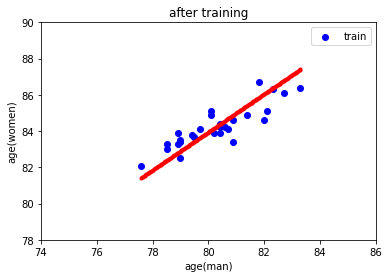

error
0.238039898376292
r square
0.8516885368372014
w
[0.013147127552501275, 1.0491464423852883]


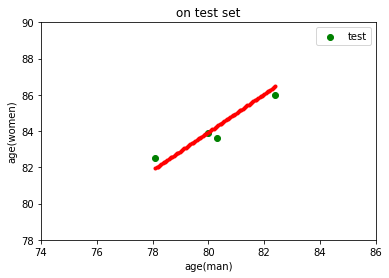

[0.013147127552501275, 1.0491464423852883]


In [16]:
x_train_list = list(x_train)
y_train_list = list(y_train)

x_test_list = list(x_test)
y_test_list = list(y_test)

M = len(y_train_list)
alpha = 0.0001

#################################################### before training ####################################################################
w =[0,0]
fig = plt.figure()
plt.scatter(x_train,y_train,color='blue')

x_major_locator=MultipleLocator(2)
#把x轴的刻度间隔设置为2，并存在变量里
y_major_locator=MultipleLocator(2)
#把y轴的刻度间隔设置为2，并存在变量里
ax=plt.gca()
# #ax为两条坐标轴的实例

ax.xaxis.set_major_locator(x_major_locator)
# #把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数
plt.xlim(74,86)
#把x轴的刻度范围设置为74到86，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
plt.ylim(78,90)
#把y轴的刻度范围设置为78到90，同理，78不会标出来，但是能看到一点空白
plt.legend(['train'])

plt.title('raw data')
plt.xlabel('age(man)')
plt.ylabel('age(women)')
plt.show()

########################################################## start training #############################################################
for i in range(101):
#     print('error')
#     print(compute_error(M,x_train_list,w,y_train_list))
    if i < 10:
        print('error')
        print(compute_error(M,x_train_list,w,y_train_list))
        print('r square')
        print(compute_r2(M,x_train_list,w,y_train_list))
        print('w')
        print(w)
        
        fig = plt.figure()
        plt.scatter(x_train,y_train,color='blue')

        x_major_locator=MultipleLocator(2)
        #把x轴的刻度间隔设置为2，并存在变量里
        y_major_locator=MultipleLocator(2)
        #把y轴的刻度间隔设置为2，并存在变量里
        ax=plt.gca()
        # #ax为两条坐标轴的实例

        ax.xaxis.set_major_locator(x_major_locator)
        # #把x轴的主刻度设置为1的倍数
        ax.yaxis.set_major_locator(y_major_locator)
        #把y轴的主刻度设置为10的倍数
        plt.xlim(74,86)
        #把x轴的刻度范围设置为74到86，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
        plt.ylim(78,90)
        #把y轴的刻度范围设置为78到90，同理，78不会标出来，但是能看到一点空白
        plt.legend(['train'])
        
        plt.plot(np.linspace(min(x_train), max(x_train), 200), w[1] * np.linspace(min(x_train), max(x_train), 200) + w[0], c= "red", marker='.', linestyle=':')
        
        plt.title('plot after {} iterations'.format(i))
        plt.xlabel('age(man)')
        plt.ylabel('age(women)')
        plt.show()
    
    # update w
    w_matrix = gradient_descent_2(M,x_train_list,w,y_train_list,alpha)
    w = [w_matrix[0][0],w_matrix[1][0]]
    
       
########################################################### after training #############################################################
print('error')
print(compute_error(M,x_train_list,w,y_train_list))
print('r square')
print(compute_r2(M,x_train_list,w,y_train_list))
print('w')
print(w)

fig = plt.figure()
plt.scatter(x_train,y_train,color='blue')

x_major_locator=MultipleLocator(2)
#把x轴的刻度间隔设置为2，并存在变量里
y_major_locator=MultipleLocator(2)
#把y轴的刻度间隔设置为2，并存在变量里
ax=plt.gca()
# #ax为两条坐标轴的实例

ax.xaxis.set_major_locator(x_major_locator)
# #把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数
plt.xlim(74,86)
#把x轴的刻度范围设置为74到86，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
plt.ylim(78,90)
#把y轴的刻度范围设置为78到90，同理，78不会标出来，但是能看到一点空白
plt.legend(['train'])

plt.plot(np.linspace(min(x_train), max(x_train), 200), w[1] * np.linspace(min(x_train), max(x_train), 200) + w[0], c= "red", marker='.', linestyle=':')

plt.title('after training')
plt.xlabel('age(man)')
plt.ylabel('age(women)')
plt.show()


############################################################# test results #########################################################3
M = len(y_test_list)
print('error')
print(compute_error(M,x_test_list,w,y_test_list))
print('r square')
print(compute_r2(M,x_test_list,w,y_test_list))
print('w')
print(w)

fig = plt.figure()
plt.scatter(x_test,y_test,color='green')

x_major_locator=MultipleLocator(2)
#把x轴的刻度间隔设置为2，并存在变量里
y_major_locator=MultipleLocator(2)
#把y轴的刻度间隔设置为2，并存在变量里
ax=plt.gca()
# #ax为两条坐标轴的实例

ax.xaxis.set_major_locator(x_major_locator)
# #把x轴的主刻度设置为1的倍数
ax.yaxis.set_major_locator(y_major_locator)
#把y轴的主刻度设置为10的倍数
plt.xlim(74,86)
#把x轴的刻度范围设置为74到86，因为0.5不满一个刻度间隔，所以数字不会显示出来，但是能看到一点空白
plt.ylim(78,90)
#把y轴的刻度范围设置为78到90，同理，78不会标出来，但是能看到一点空白
plt.legend(['test'])

plt.plot(np.linspace(min(x_test), max(x_test), 100), w[1] * np.linspace(min(x_test), max(x_test), 100) + w[0], c= "red", marker='.', linestyle=':')

plt.title('on test set')
plt.xlabel('age(man)')
plt.ylabel('age(women)')
plt.show()




print(w)

### R square

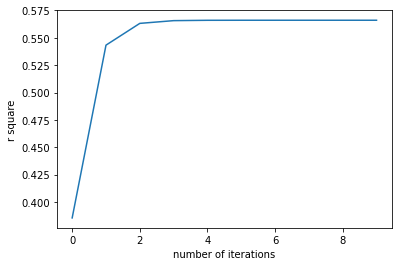

In [17]:
x_train_list = list(x_train)
y_train_list = list(y_train)
M = len(y_train_list)
alpha = 0.0001
r2 = []
w =[0.013001356752405248, 1.0432514047068266]
for i in range(10):
    r2.append(compute_r2(M,x_train_list,w,y_train_list))    
    
    # update w
    w_matrix = gradient_descent_2(M,x_train_list,w,y_train_list,alpha)
    w = [w_matrix[0][0],w_matrix[1][0]]
fig = plt.figure()
plt.xlabel('number of iterations')
plt.ylabel('r square')
plt.plot(r2)
plt.show()

### synthetic data

In [18]:
# x,y,p = datasets.make_regression(n_samples=200,n_features=1,n_informative=1,noise=1300,coef=True)
# # partition the data
# generate_x_train, generate_x_test ,generate_y_train, generate_y_test = model_selection.train_test_split(x,
#                                                             y,
#                                                            test_size=0.12)

In [19]:
generate_x_test_list = generate_x_test.transpose()
generate_y_test_list = generate_y_test.tolist()
M = len(generate_y_test_list)
alpha = 0.5

w =[0,0]
for i in range(300):
    w_matrix = gradient_descent_2(M,generate_x_test_list,w,generate_y_test_list,alpha)
    w = [w_matrix[0][0],w_matrix[1][0]]
    print('error')
    print(compute_error(M,generate_x_test_list,w,generate_y_test_list))
#     print('new_w')
#     print(gradient_descent_2(M,generate_x_test,w,generate_y_test_list,alpha))
print(w)

error
135.53963943541936
error
82.41659487466838
error
68.2050225048677
error
64.24387473868111
error
63.102773125868865
error
62.76579035690041
error
62.664491015147256
error
62.6336640472097
error
62.62420518824803
error
62.621286971600895
error
62.62038343236895
error
62.62010302899597
error
62.62001587849799
error
62.61998876563295
error
62.619980325482324
error
62.61997769704391
error
62.619976878284525
error
62.619976623199
error
62.61997654371847
error
62.61997651895196
error
62.619976511234235
error
62.61997650882919
error
62.61997650807971
error
62.61997650784616
error
62.619976507773366
error
62.619976507750664
error
62.619976507743615
error
62.6199765077414
error
62.61997650774073
error
62.61997650774049
error
62.61997650774043
error
62.61997650774042
error
62.61997650774041
error
62.61997650774041
error
62.6199765077404
error
62.61997650774042
error
62.6199765077404
error
62.6199765077404
error
62.6199765077404
error
62.6199765077404
error
62.61997650774042
error
62.6199765

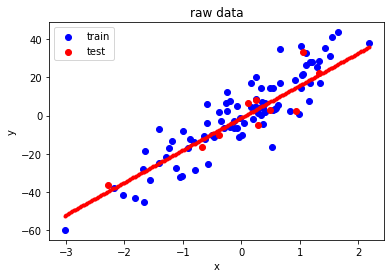

In [20]:
fig = plt.figure()
plt.scatter(generate_x_train,generate_y_train,color='blue')
plt.scatter(generate_x_test,generate_y_test,color = 'red')

plt.legend(['train','test'])

plt.title('raw data')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(np.linspace(min(generate_x_train), max(generate_x_train), 200), w[1] * np.linspace(min(generate_x_train), max(generate_x_train), 200) + w[0], c= "red", marker='.', linestyle=':')
plt.show()

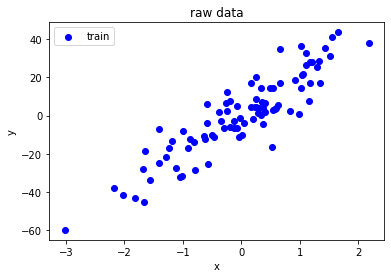

error
442.5201242534424
r_square
-0.0003956657746226888
w
[0, 0]


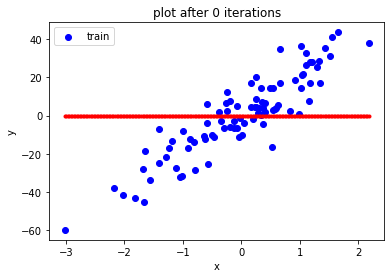

error
171.81701719136447
r_square
0.6115769885165223
w
[0.20917744739895053, 9.492710510362912]


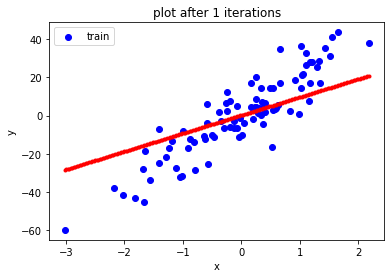

error
103.78418366286284
r_square
0.7653773425842616
w
[0.32405317121887295, 14.251331984492374]


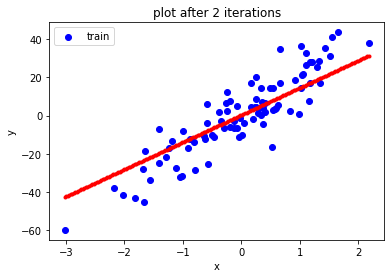

error
86.68593852179106
r_square
0.8040309752531428
w
[0.3866478257671532, 16.63680253594231]


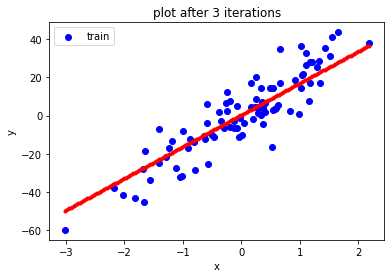

error
82.38867350199575
r_square
0.813745709261547
w
[0.42053022458890854, 17.832631119589944]


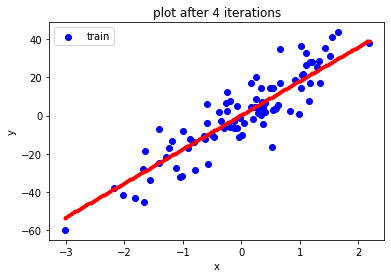

error
81.3086323238392
r_square
0.8161873349736176
w
[0.4387673119098397, 18.432098789969952]


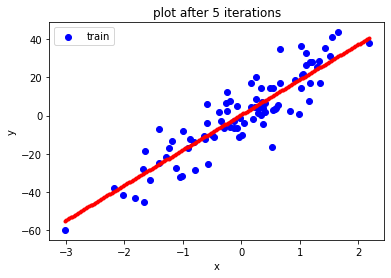

error
81.03717846208127
r_square
0.8168010048427983
w
[0.44853548288072104, 18.732612688896857]


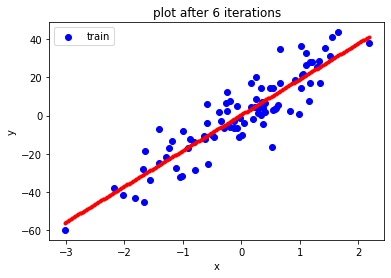

error
80.9689509983063
r_square
0.8169552451932511
w
[0.45374522735587597, 18.883261363562177]


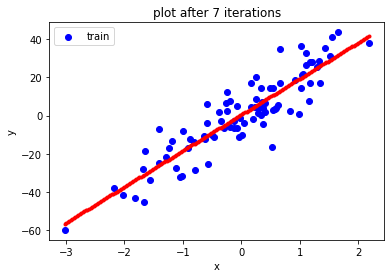

error
80.9518023504963
r_square
0.8169940127701426
w
[0.45651335359058515, 18.958782413226185]


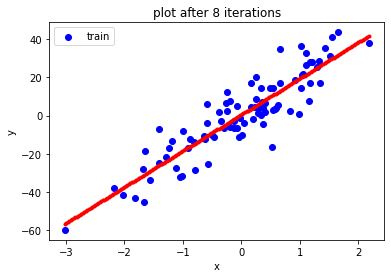

error
80.94749204608337
r_square
0.8170037569820248
w
[0.45797925687847274, 18.9966417206268]


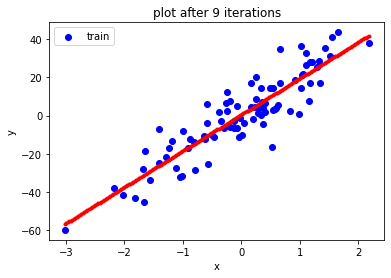

error
80.94604487453459
r_square
0.8170070285714185
w
[0.4596097006154701, 19.03470031117292]


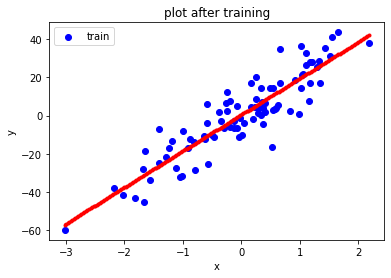

error
70.29775868342671
r_square
0.795132180170641
w
[0.4596097006154701, 19.03470031117292]


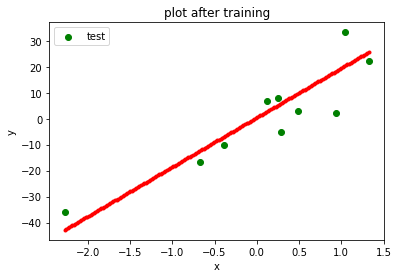

In [21]:
generate_x_test_list = generate_x_test.transpose()
generate_y_test_list = generate_y_test.tolist()

generate_x_train_list = generate_x_train.transpose()
generate_y_train_list = generate_y_train.tolist()

M = len(generate_y_train_list)
alpha = 0.5

w =[0,0]

################################################# before training #######################################################
fig = plt.figure()
plt.scatter(generate_x_train,generate_y_train,color='blue')

plt.legend(['train','test'])

plt.title('raw data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


############################################################ start training ###################################################################
for i in range(5000):
    if i <10:
        print('error')
        print(compute_error(M,generate_x_train_list,w,generate_y_train_list))
        print('r_square')
        print(compute_r2(M,generate_x_train_list,w,generate_y_train_list))
        print('w')
        print(w)
        fig = plt.figure()
        plt.scatter(generate_x_train,generate_y_train,color='blue')

        plt.legend(['train'])

        plt.title('plot after {} iterations'.format(i))
        plt.xlabel('x')
        plt.ylabel('y')
        plt.plot(np.linspace(min(generate_x_train), max(generate_x_train), 200), w[1] * np.linspace(min(generate_x_train), max(generate_x_train), 200) + w[0], c= "red", marker='.', linestyle=':')
        plt.show()
    
    # update w
    w_matrix = gradient_descent_2(M,generate_x_train_list,w,generate_y_train_list,alpha)
    w = [w_matrix[0][0],w_matrix[1][0]]
    
    
################################################## after training ######################################################################
print('error')
print(compute_error(M,generate_x_train_list,w,generate_y_train_list))
print('r_square')
print(compute_r2(M,generate_x_train_list,w,generate_y_train_list))
print('w')
print(w)
fig = plt.figure()
plt.scatter(generate_x_train,generate_y_train,color='blue')

plt.legend(['train'])

plt.title('plot after training')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(np.linspace(min(generate_x_train), max(generate_x_train), 200), w[1] * np.linspace(min(generate_x_train), max(generate_x_train), 200) + w[0], c= "red", marker='.', linestyle=':')
plt.show()

############################################################# test results #########################################################3
M = len(generate_y_test_list)
print('error')
print(compute_error(M,generate_x_test_list,w,generate_y_test_list))
print('r_square')
print(compute_r2(M,generate_x_test_list,w,generate_y_test_list))
print('w')
print(w)
fig = plt.figure()
plt.scatter(generate_x_test,generate_y_test,color='green')

plt.legend(['test'])

plt.title('plot after training')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(np.linspace(min(generate_x_test), max(generate_x_test), 200), w[1] * np.linspace(min(generate_x_test), max(generate_x_test), 200) + w[0], c= "red", marker='.', linestyle=':')
plt.show()


# print(w)

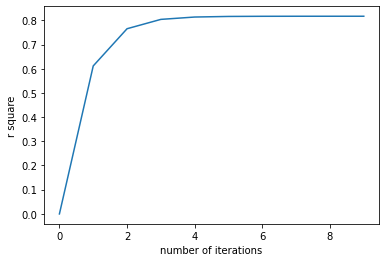

In [22]:
generate_x_test_list = generate_x_test.transpose()
generate_y_test_list = generate_y_test.tolist()

generate_x_train_list = generate_x_train.transpose()
generate_y_train_list = generate_y_train.tolist()

M = len(generate_y_train_list)
alpha = 0.5

w =[0,0]
r2 = []
for i in range(10):
    
    r2.append(compute_r2(M,generate_x_train_list,w,generate_y_train_list))
    
    # update w
    w_matrix = gradient_descent_2(M,generate_x_train_list,w,generate_y_train_list,alpha)
    w = [w_matrix[0][0],w_matrix[1][0]]

fig = plt.figure()
plt.xlabel('number of iterations')
plt.ylabel('r square')
plt.plot(r2)
plt.show()

### 4.1.1 Choosing a Learning Rate

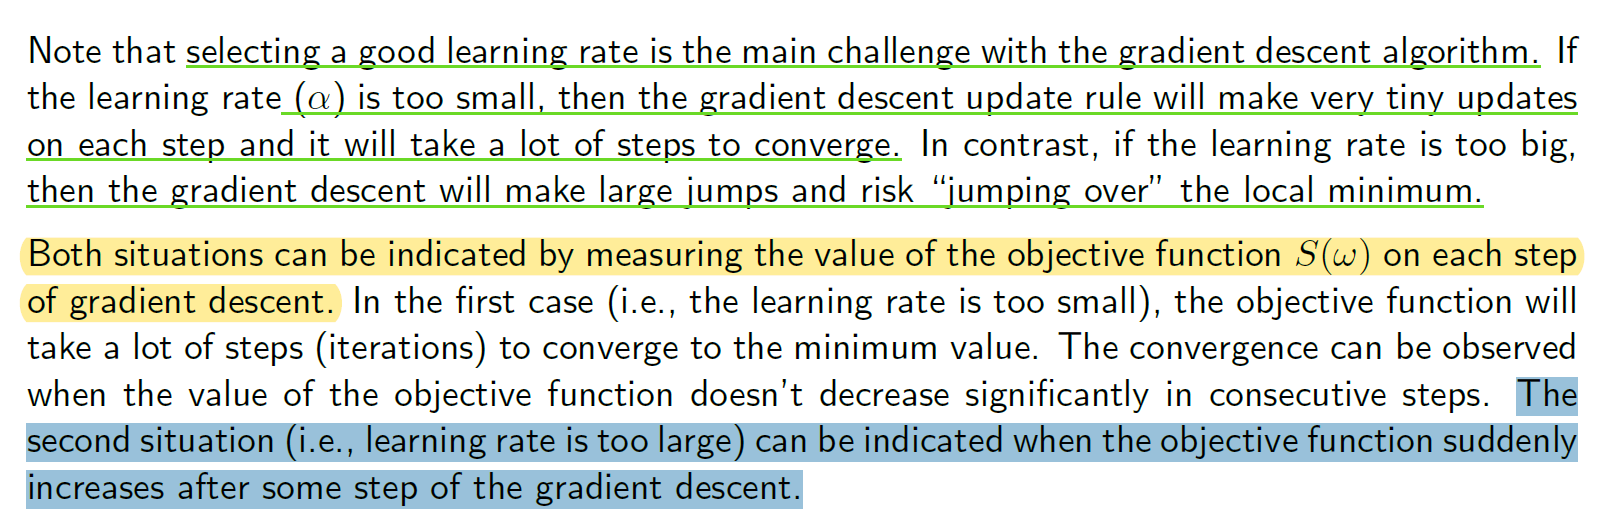

### 4.1.2 Knowing when to stop iterating

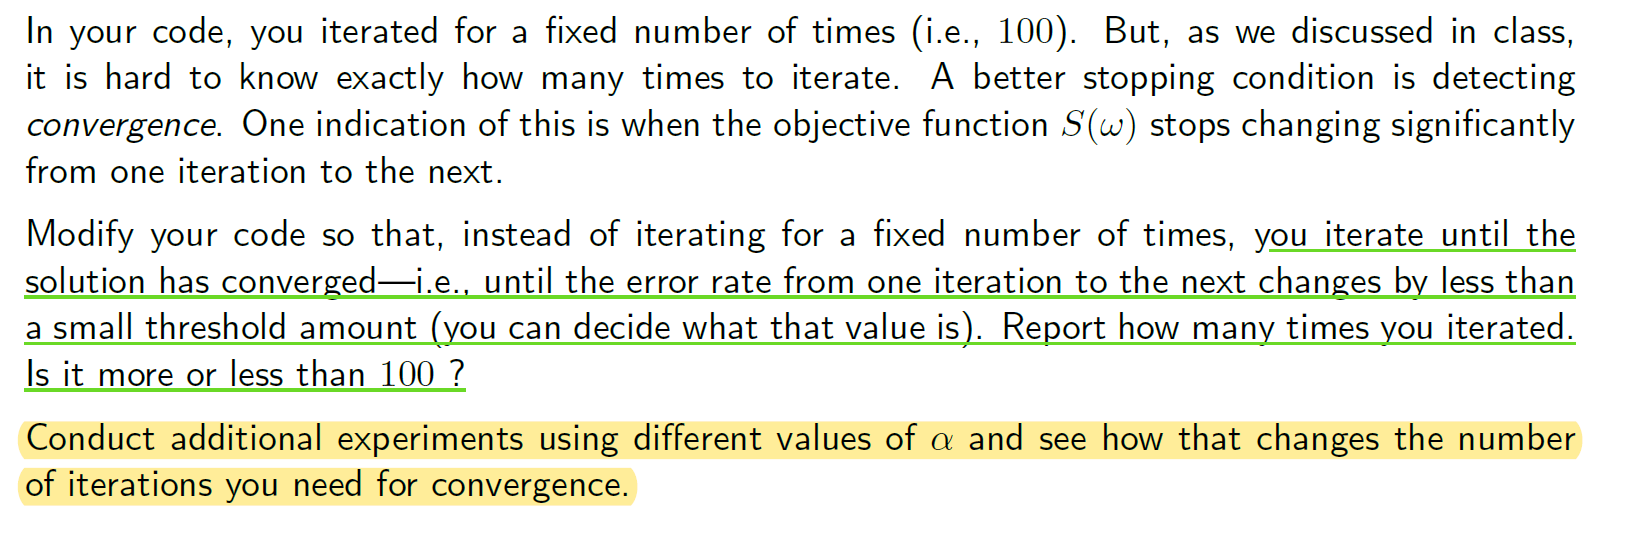

learning rate大了直接就不converge了<br>
learning rate小多循环几次还能得到正确的结果

In [23]:
generate_x_test_list = generate_x_test.transpose()
generate_y_test_list = generate_y_test.tolist()
M = len(generate_y_test_list)
alpha = 0.5
sigma = 0.0000000000000000001
number_of_iteration = 0
w =[0,0]
error_intial = 0
while True:
    error_now = compute_error(M,generate_x_test_list,w,generate_y_test_list)
    if abs(error_now - error_intial)<sigma:
        break
    else:
        w_matrix = gradient_descent_2(M,generate_x_test_list,w,generate_y_test_list,alpha)
        w = [w_matrix[0][0],w_matrix[1][0]]
        error_intial = error_now
        number_of_iteration = number_of_iteration+1
print(number_of_iteration)

34


## 4.2 Using the Linear Regression package in scikit-learn

对于scikit而言<br>
因变量输入的形式是：一列输入，y是一个(28,1)或者(28,)
<br>自变量输入的形式是：每一个record占一行，一共有28个数据，就是28行，自变量这个矩阵不在最前面加1
<br>总而言之，就是一条记录一行

In [24]:
from sklearn import linear_model
from sklearn import metrics

# initialise model
lr = linear_model.LinearRegression()

# builld model by fitting parameters to the training data
x_train_test = np.array(x_train).reshape(1,-1).transpose()
y_train_test = np.array(y_train)
lr.fit(x_train_test,y_train_test)

# output the regression equation
print('scikit regression equation y =')
print(lr.intercept_,'+',lr.coef_[0],'x')

# measure how good the predictions are with the training data and output scores
print()
print('measure how good the predictions are with the training data and output scores')
y_hat = lr.predict(np.array(x_train).reshape(1,-1).transpose())
print('r2 = ')
print(metrics.r2_score(y_train_test,y_hat))
print('mean square error=')
print(metrics.mean_squared_error(np.array(y_train).reshape(1,-1).transpose(),y_hat))

print()
print('measure how good the predictions are with the training data and output scores')
# measure how good the predictions are with the training data and output scores
y_hat = lr.predict(np.array(x_test).reshape(1,-1).transpose())
print('r2 = ')
print(metrics.r2_score(np.array(y_test),y_hat))
print('mean square error = ')
print(metrics.mean_squared_error(np.array(y_test).reshape(1,-1).transpose(),y_hat))


scikit regression equation y =
28.19106707135633 + 0.6983276795810269 x

measure how good the predictions are with the training data and output scores
r2 = 
0.7571932413018381
mean square error=
0.3016378452827319

measure how good the predictions are with the training data and output scores
r2 = 
0.9075405008666453
mean square error = 
0.14839749610903435


In [25]:
Ir2 = linear_model.LinearRegression()
# builld model by fitting parameters to the training data

Ir2.fit(generate_x_train,generate_y_train)
w_sklearn = []
w_sklearn.append( Ir2.intercept_)
w_sklearn.append( Ir2.coef_[0])

y_hat2 = Ir2.predict(generate_x_train)


r2 = metrics.r2_score(generate_y_train,y_hat2)
error = metrics.mean_squared_error(generate_y_train,y_hat2)

error
80.94604487453459
r_square
0.8170070285714185
w
[0.4596097006154701, 19.03470031117293]


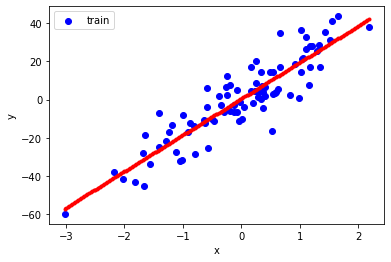

In [26]:
print('error')
print(error)
print('r_square')
print(r2)
print('w')
print(w_sklearn)
fig = plt.figure()
plt.scatter(generate_x_train,generate_y_train,color='blue')

plt.legend(['train'])

plt.xlabel('x')
plt.ylabel('y')
plt.plot(np.linspace(min(generate_x_train), max(generate_x_train), 200), w_sklearn[1] * np.linspace(min(generate_x_train), max(generate_x_train), 200) + w_sklearn[0], c= "red", marker='.', linestyle=':')
plt.show()

In [27]:
y2_hat = Ir2.predict(generate_x_test)
r2_test = metrics.r2_score(generate_y_test,y2_hat)
error2 = metrics.mean_squared_error(generate_y_test,y2_hat)

error
70.29775868342676
r_square
0.7951321801706409
w
[0.4596097006154701, 19.03470031117293]


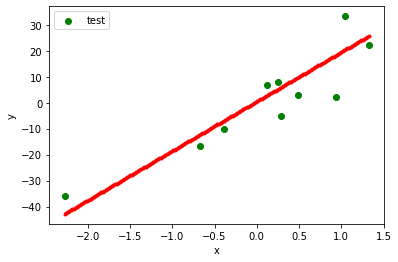

In [28]:
print('error')
print(error2)
print('r_square')
print(r2_test)
print('w')
print(w_sklearn)
fig = plt.figure()
plt.scatter(generate_x_test,generate_y_test,color='green')

plt.legend(['test'])

plt.xlabel('x')
plt.ylabel('y')
plt.plot(np.linspace(min(generate_x_test), max(generate_x_test), 200), w_sklearn[1] * np.linspace(min(generate_x_test), max(generate_x_test), 200) + w_sklearn[0], c= "red", marker='.', linestyle=':')
plt.show()

# 5 Linear Classification with a Perceptron

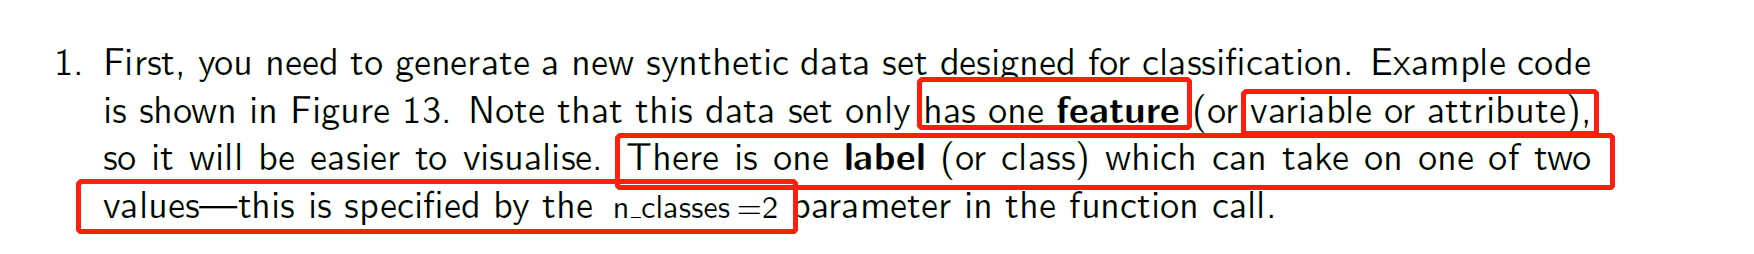

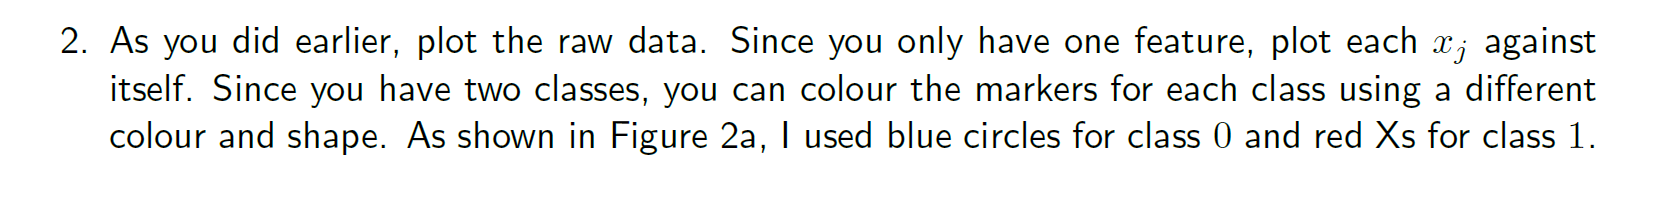

In [29]:
from sklearn import datasets
x,y = datasets.make_classification(n_features = 1,n_redundant=0,n_informative=1,n_classes=2,n_clusters_per_class=1,n_samples=100)
# x_train = np.array(x_train).reshape(1,-1).transpose()
# y_train = np.array(y_train)

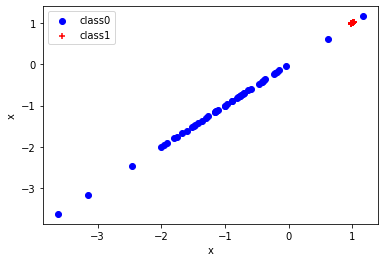

In [30]:
fig = plt.figure()
data_set=pd.concat([pd.DataFrame(x),pd.DataFrame(y)],axis=1,ignore_index=True)
data_set.rename(columns={0:'x',1:'y'},inplace=True)
plt.scatter(data_set[data_set['y']==0]['x'],data_set[data_set['y']==0]['x'],c='blue',marker='o',label='class0')
plt.scatter(data_set[data_set['y']==1]['x'],data_set[data_set['y']==1]['x'],c='red',marker='+',label='class1')
plt.xlabel('x')
plt.ylabel('x')
plt.legend(['class0','class1'])
plt.show()

In [31]:
# partition the data
x_train, x_test ,y_train, y_test = model_selection.train_test_split(data_set['x'],
                                                            data_set['y'],
                                                           test_size=0.10)

In [32]:
data_set['z'] ='train'
data_set.loc[data_set.loc[x_test.index].index,['z']] = 'test' 

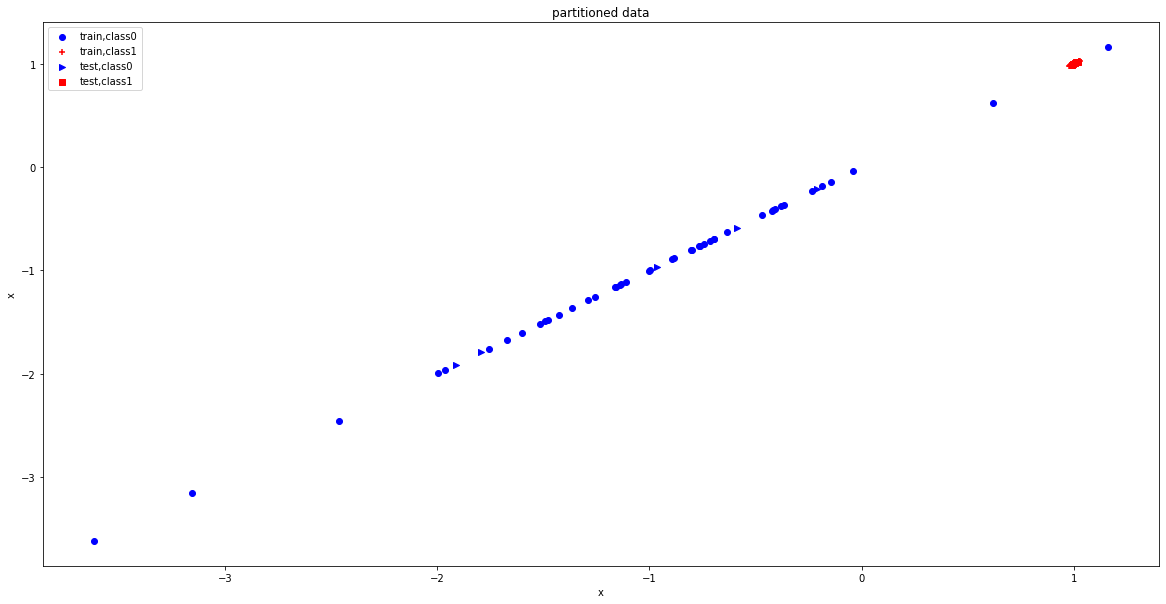

In [33]:
fig = plt.figure(figsize=(20,10))
plt.scatter(data_set[(data_set['y']==0) & (data_set['z']=='train')]['x'],data_set[(data_set['y']==0) & (data_set['z']=='train')]['x'],c='blue',marker='o',label='train,class0')
plt.scatter(data_set[(data_set['y']==1) & (data_set['z']=='train')]['x'],data_set[(data_set['y']==1) & (data_set['z']=='train')]['x'],c='red',marker='+',label='train,class1')
plt.scatter(data_set[(data_set['y']==0) & (data_set['z']=='test')]['x'],data_set[(data_set['y']==0) & (data_set['z']=='test')]['x'],c='blue',marker='>',label='train,class0')
plt.scatter(data_set[(data_set['y']==1) & (data_set['z']=='test')]['x'],data_set[(data_set['y']==1) & (data_set['z']=='test')]['x'],c='red',marker='s',label='test,class1')

plt.xlabel('x')
plt.ylabel('x')
plt.legend(['train,class0','train,class1','test,class0','test,class1'])
plt.title('partitioned data')
plt.show()

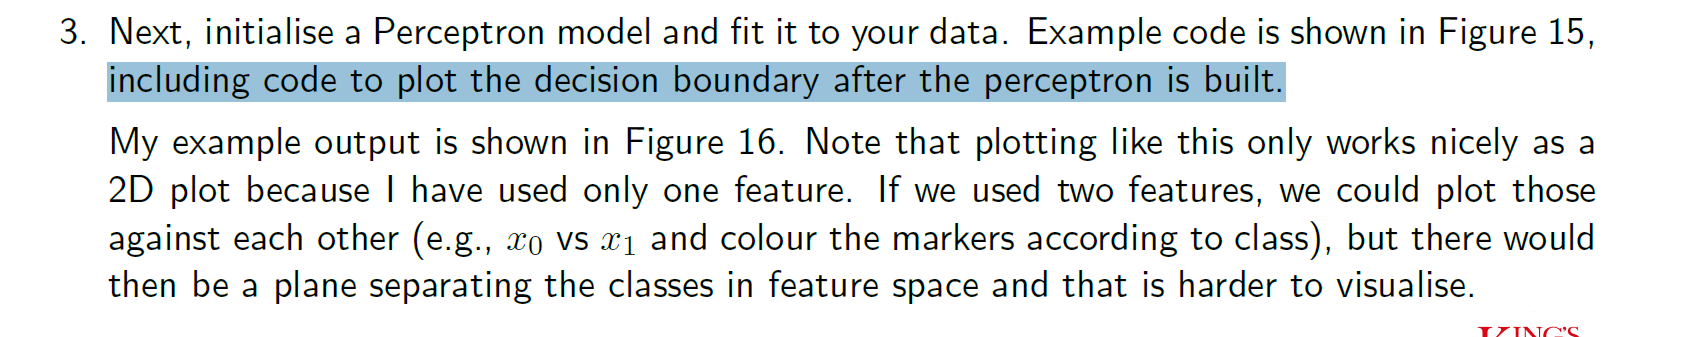

In [34]:
# initialize the perceptron model
per = linear_model.Perceptron()
x_train = np.array(x_train).reshape(1,-1).transpose()
y_train = np.array(y_train)
# build the model by adjusting the weights to fit the data
per.fit(x_train,y_train)
# predict the output using the model
y_hat = per.predict(x_train)
# plot the decision boundary 
######################################################################################################################################
#####################################################################################################################################
per.coef_[0][0]

1.1303132880820532

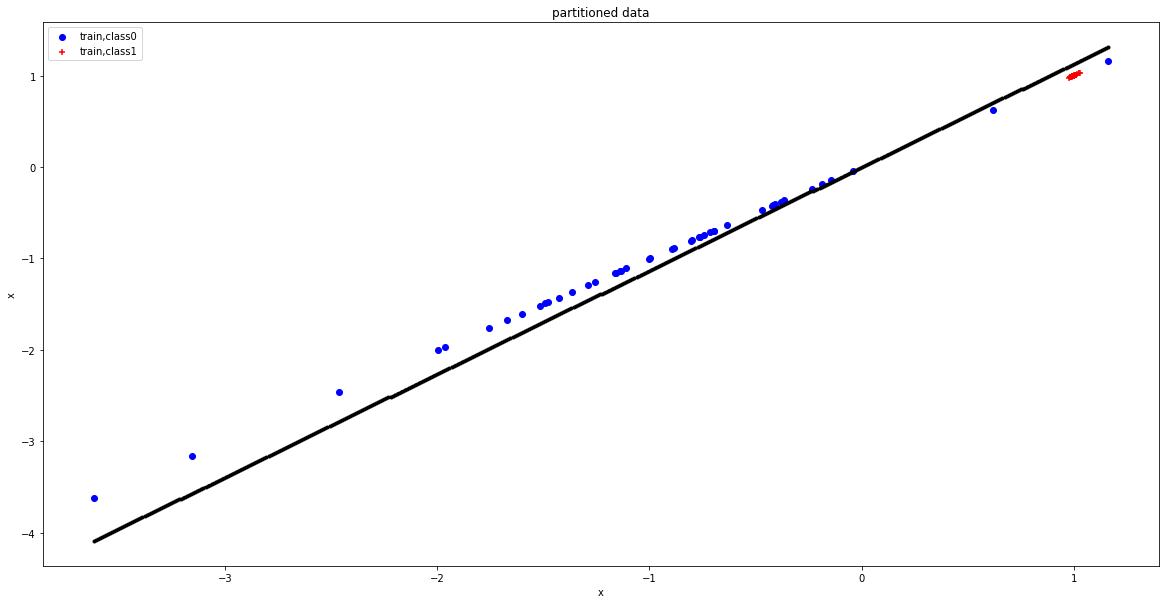

In [35]:
fig = plt.figure(figsize=(20,10))
plt.scatter(data_set[(data_set['y']==0) & (data_set['z']=='train')]['x'],data_set[(data_set['y']==0) & (data_set['z']=='train')]['x'],c='blue',marker='o',label='train,class0')
plt.scatter(data_set[(data_set['y']==1) & (data_set['z']=='train')]['x'],data_set[(data_set['y']==1) & (data_set['z']=='train')]['x'],c='red',marker='+',label='train,class1')
plt.legend(['train,class0','train,class1'])

plt.xlabel('x')
plt.ylabel('x')

plt.plot(np.linspace(min(data_set['x']), max(data_set['x']), 500), per.coef_[0][0] * np.linspace(min(data_set['x']), max(data_set['x']), 500), c= "black", marker='.', linestyle=':')

plt.title('partitioned data')
plt.show()

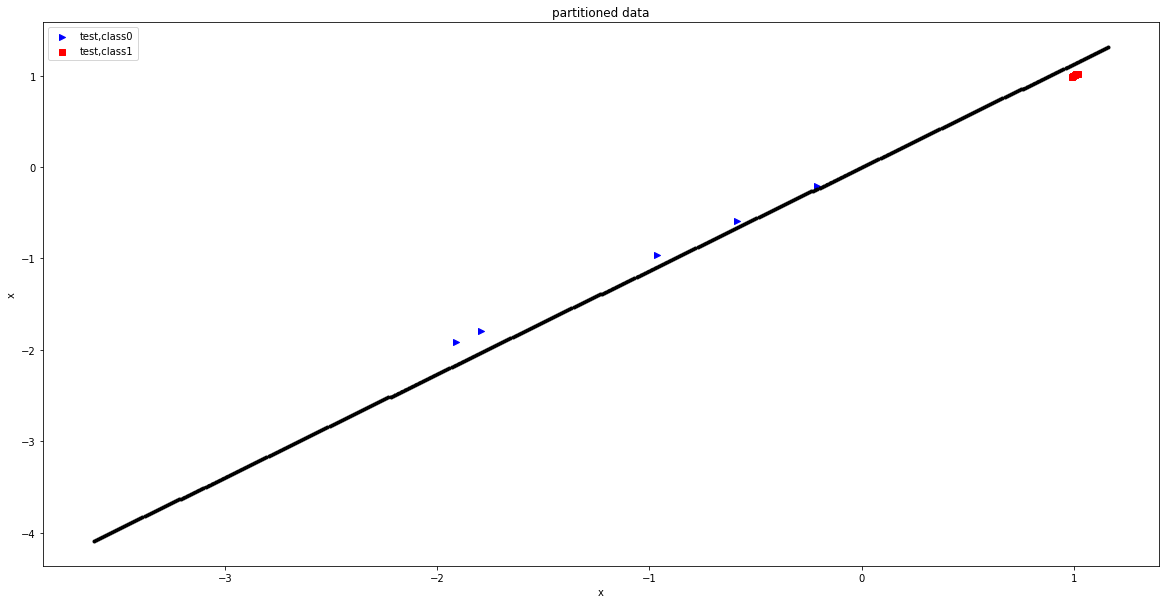

In [36]:
fig = plt.figure(figsize=(20,10))
plt.scatter(data_set[(data_set['y']==0) & (data_set['z']=='test')]['x'],data_set[(data_set['y']==0) & (data_set['z']=='test')]['x'],c='blue',marker='>',label='train,class0')
plt.scatter(data_set[(data_set['y']==1) & (data_set['z']=='test')]['x'],data_set[(data_set['y']==1) & (data_set['z']=='test')]['x'],c='red',marker='s',label='test,class1')
plt.legend(['test,class0','test,class1'])
plt.plot(np.linspace(min(data_set['x']), max(data_set['x']), 500), per.coef_[0][0] * np.linspace(min(data_set['x']), max(data_set['x']), 500), c= "black", marker='.', linestyle=':')
plt.xlabel('x')
plt.ylabel('x')
plt.title('partitioned data')
plt.show()

In [37]:
from sklearn import metrics

In [38]:
print('accuracy = %f'%(metrics.accuracy_score(y_train,y_hat,normalize=True)))

accuracy = 0.988889


In [39]:
y_hat_test = per.predict(np.array(x_test).reshape(1,-1).transpose())
print('accuracy = %f'%(metrics.accuracy_score(np.array(y_test),y_hat_test,normalize=True)))

accuracy = 1.000000
